In [3]:
#Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [4]:
df = pd.read_csv("/Users/rahulmaddali/Documents/VIT/Exploratory Data Analysis/Lab/Breast Cancer Dataset.csv")
df.head(

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
#Dimensions and Summary
print("Dimensions:", df.shape)
print("Column Names:", df.columns)
print("Data Types:\n", df.dtypes)
print("Summary:\n", df.describe(include='all'))
df.info()

Dimensions: (569, 33)
Column Names: Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')
Data Types:
 id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concav

In [5]:
#Remove duplicates
df.drop_duplicates(inplace=True)

In [7]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

/var/folders/v0/fz9wbk8s4vq8qjz8z99604m80000gn/T/ipykernel_14216/1210444597.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


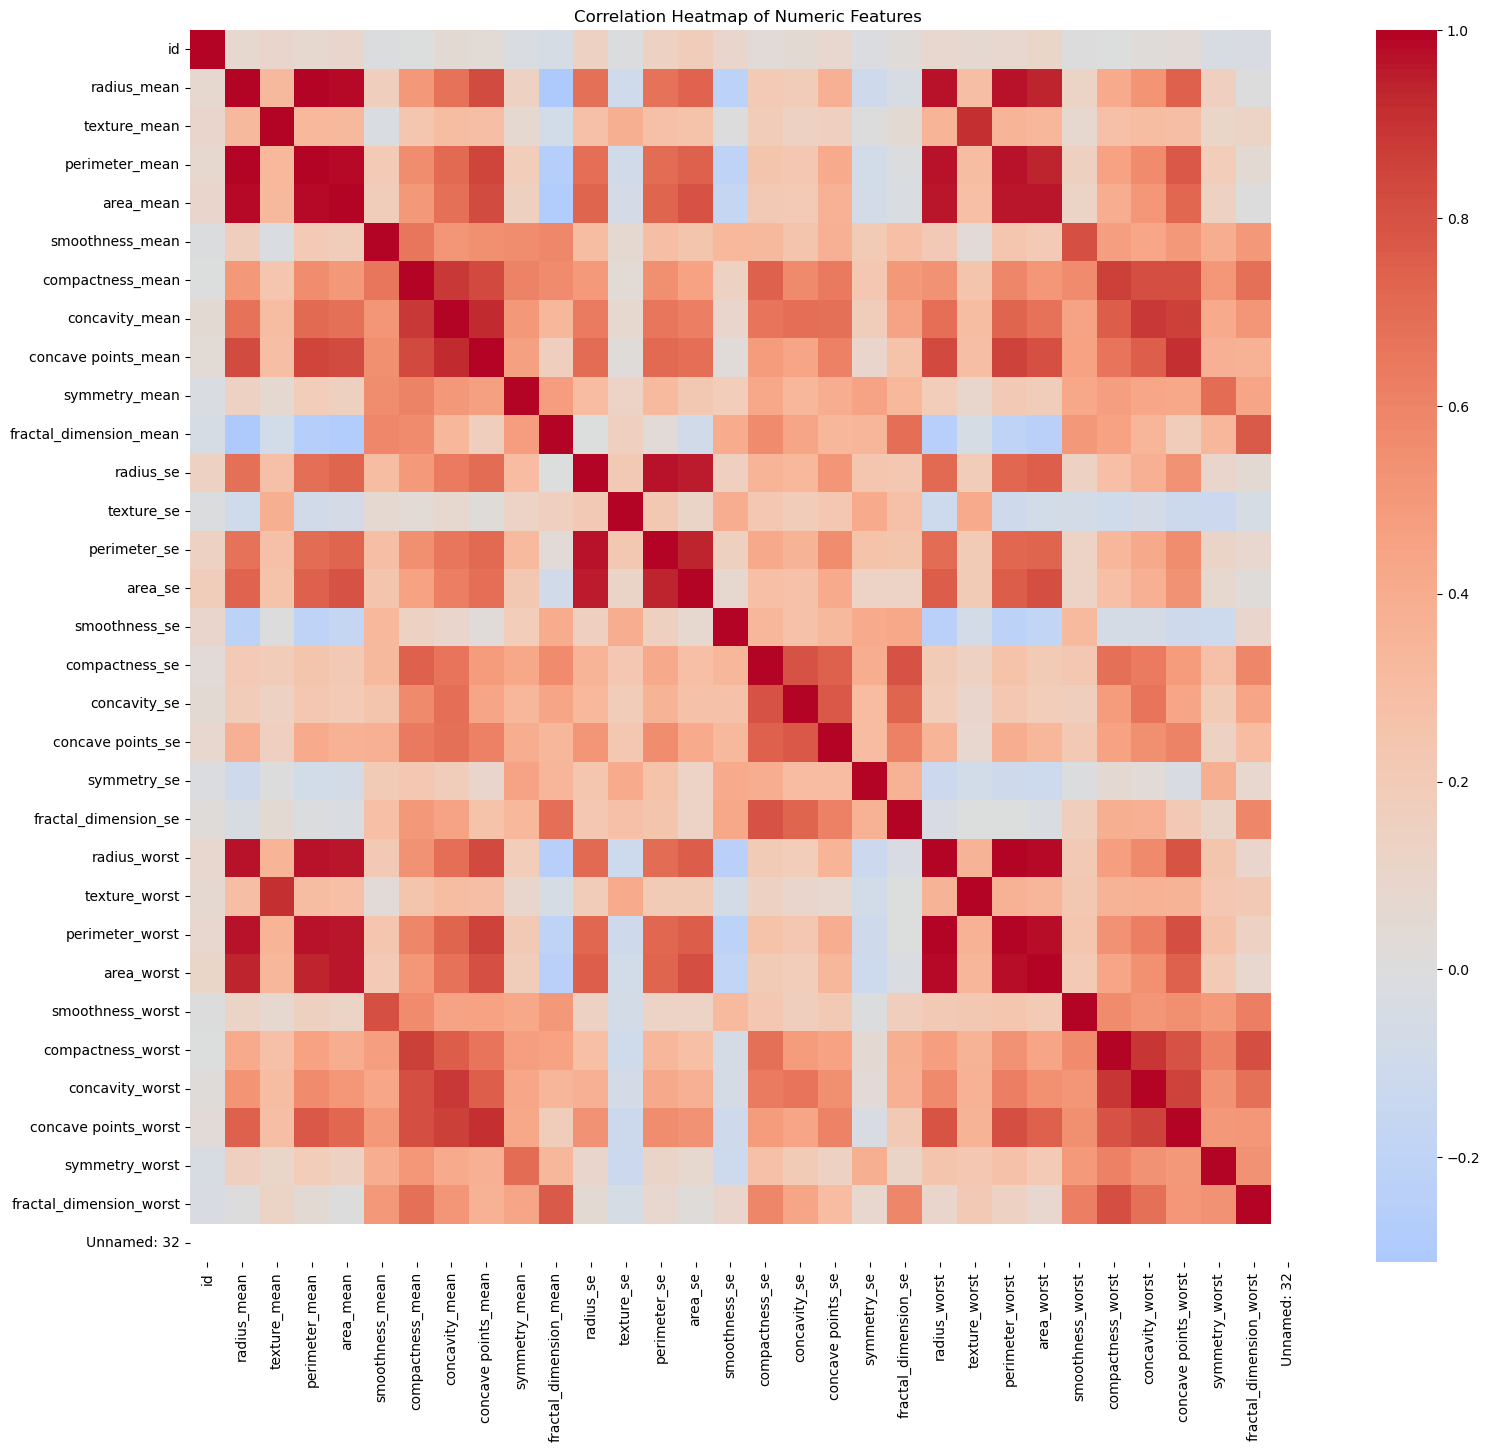

In [6]:
# Correlation heatmap
plt.figure(figsize=(18, 16))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

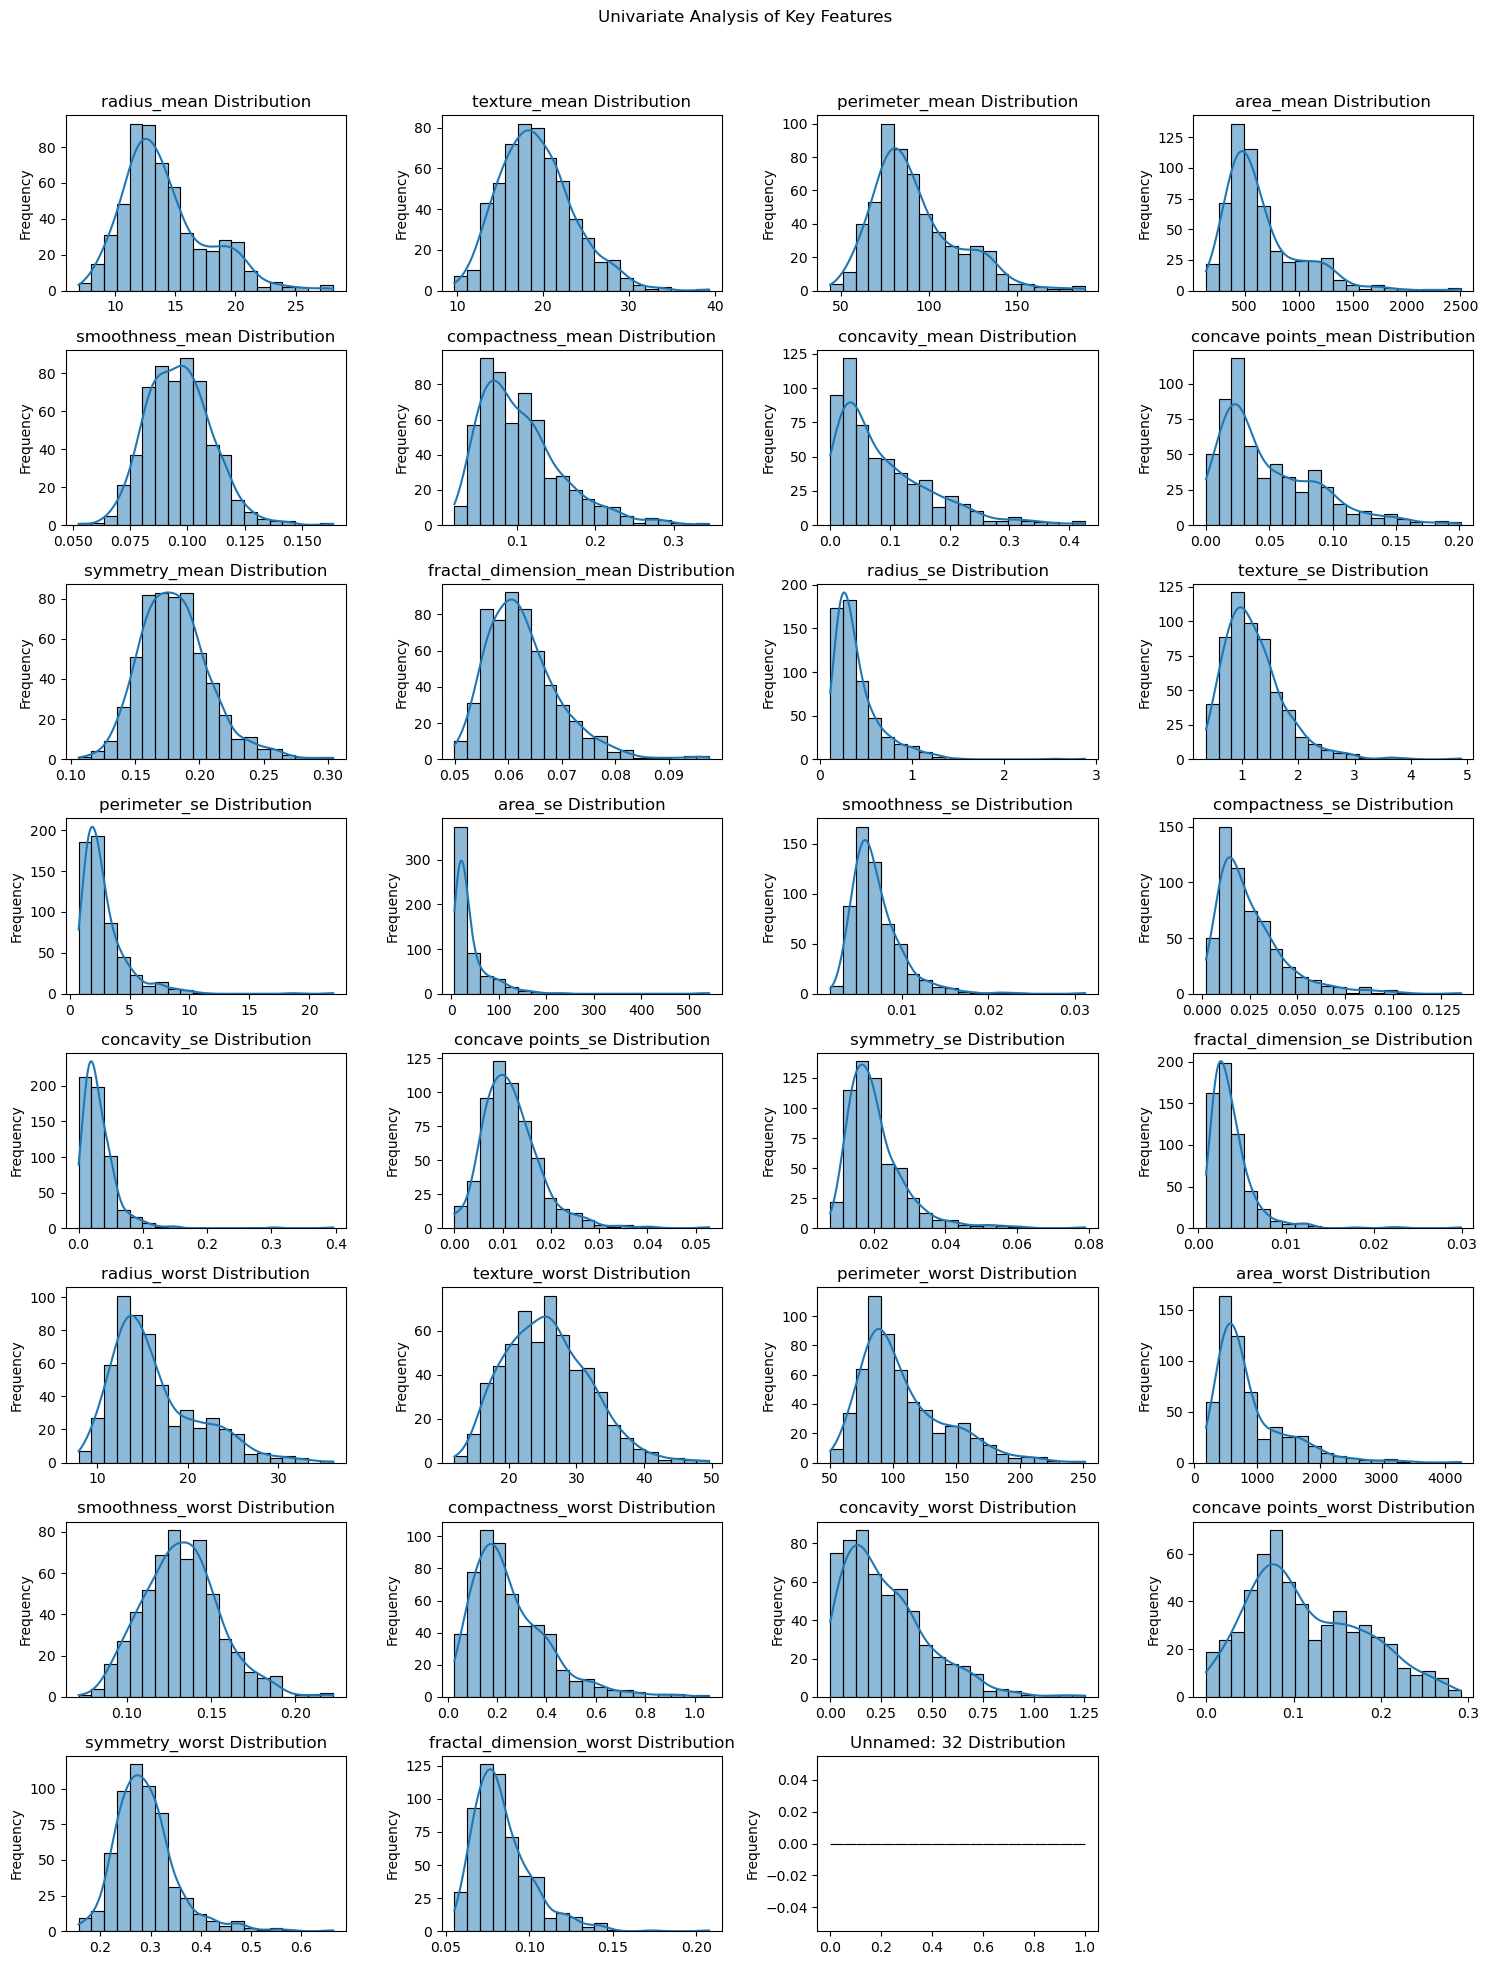

In [7]:
df['diagnosis'] = df['diagnosis'].astype('category')

# Univariate Analysis
plt.figure(figsize=(15, 20))
plt.suptitle('Univariate Analysis of Key Features')

# Numerical columns for univariate analysis
numeric_columns = df.select_dtypes(include=['float64']).columns

# Histograms for each numerical feature
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(8, 4, i)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'{col} Distribution')
    plt.xlabel('')
    plt.ylabel('Frequency')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

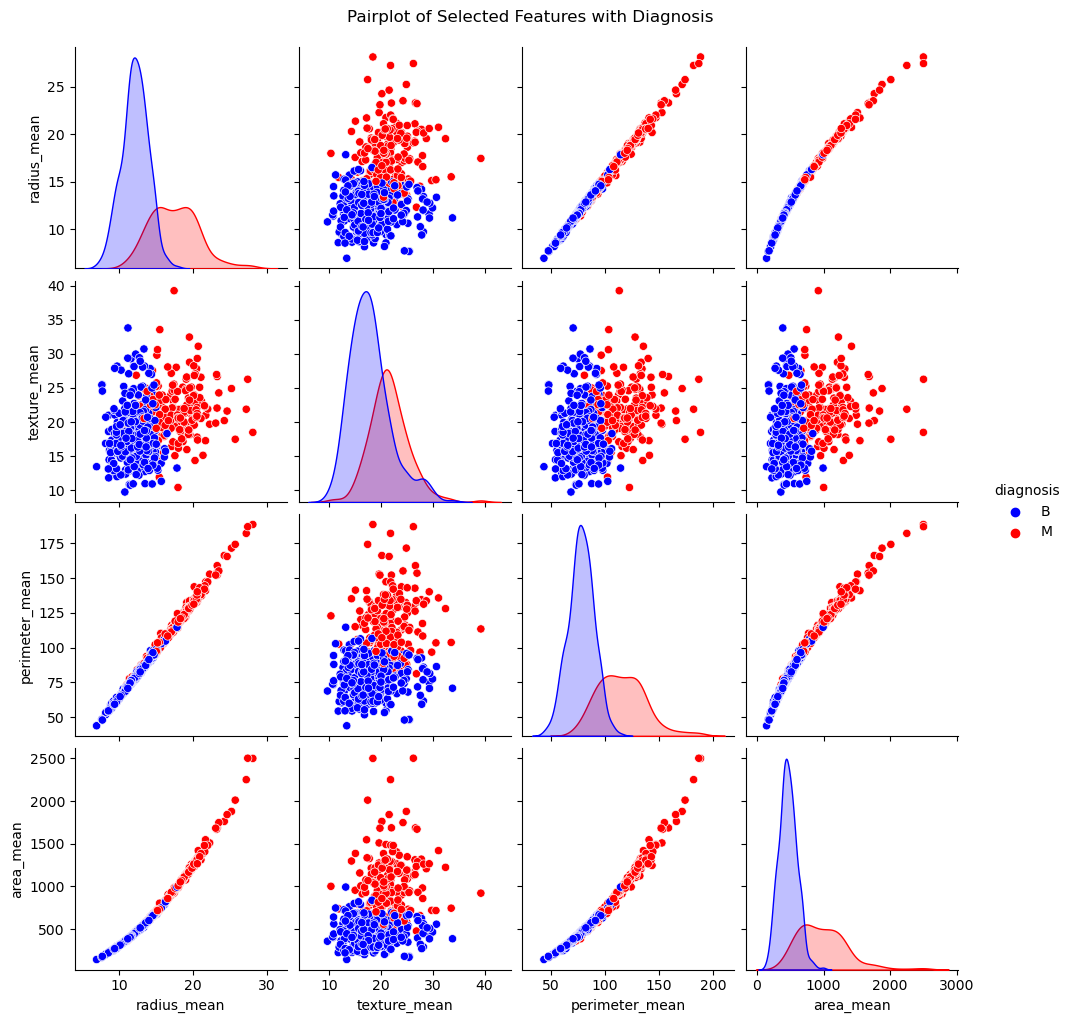

In [8]:
# Subset of features for clarity in pairplot
selected_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'diagnosis']

# Subset the data
pairplot_data = df[selected_features]

# Pairplot
sns.pairplot(pairplot_data, hue='diagnosis', palette={'M': 'red', 'B': 'blue'}, diag_kind='kde')
plt.suptitle('Pairplot of Selected Features with Diagnosis', y=1.02)
plt.show()

In [39]:
print("DataFrame Shape:", df.shape)
print("PCA Result Shape:", pca_result_df.shape)

DataFrame Shape: (569, 37)
PCA Result Shape: (569, 2)


In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Drop the unnecessary column
df = df.drop(columns=['Unnamed: 32', 'id']) 

# Ensure the diagnosis column is categorical
df['diagnosis'] = df['diagnosis'].astype('category')

# Display dataset info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   diagnosis                569 non-null    category
 1   radius_mean              569 non-null    float64 
 2   texture_mean             569 non-null    float64 
 3   perimeter_mean           569 non-null    float64 
 4   area_mean                569 non-null    float64 
 5   smoothness_mean          569 non-null    float64 
 6   compactness_mean         569 non-null    float64 
 7   concavity_mean           569 non-null    float64 
 8   concave points_mean      569 non-null    float64 
 9   symmetry_mean            569 non-null    float64 
 10  fractal_dimension_mean   569 non-null    float64 
 11  radius_se                569 non-null    float64 
 12  texture_se               569 non-null    float64 
 13  perimeter_se             569 non-null    float64 
 14  area_se   

/Users/rahulmaddali/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/rahulmaddali/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/rahulmaddali/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/rahulmaddali/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of

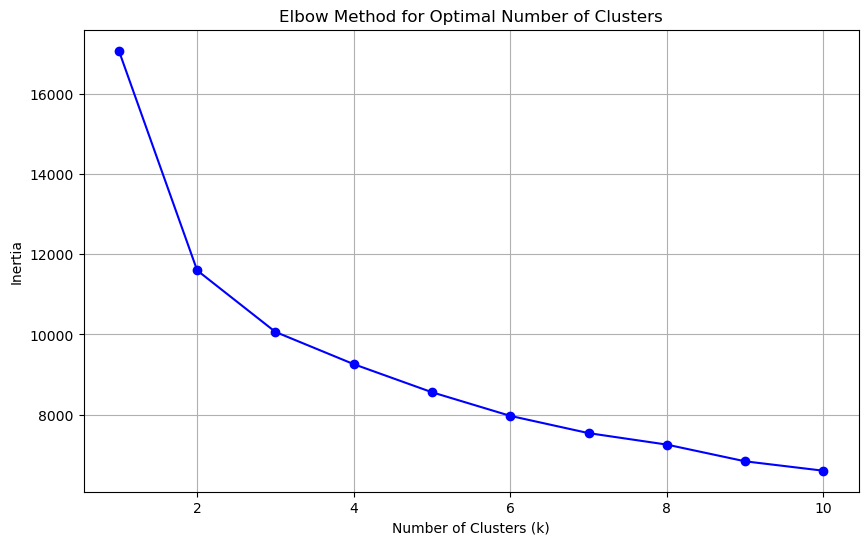

/Users/rahulmaddali/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


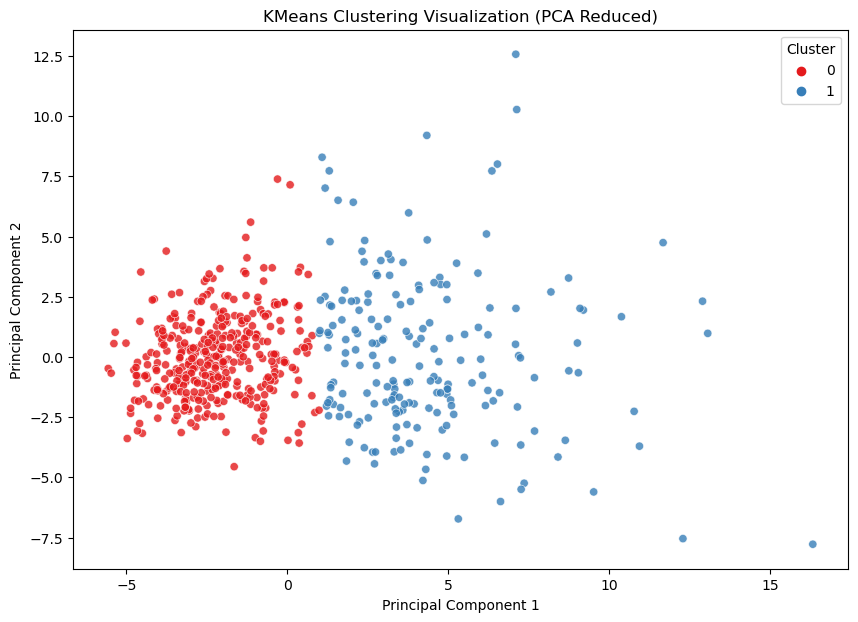

Silhouette Score for k=2: 0.3433822406907781


In [14]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


# Remove unnecessary columns
df = df.drop(columns=['id', 'Unnamed: 32'], errors='ignore')

# Numerical columns for clustering
numeric_columns = df.select_dtypes(include=['float64']).columns
X = df[numeric_columns]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow Method
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bo-')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid()
plt.show()

# k=2
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Cluster labels
df['Cluster'] = clusters


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# Scatter plot of the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set1', alpha=0.8)
plt.title('KMeans Clustering Visualization (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

# Silhouette score
silhouette_avg = silhouette_score(X_scaled, clusters)
print(f'Silhouette Score for k={optimal_k}: {silhouette_avg}')

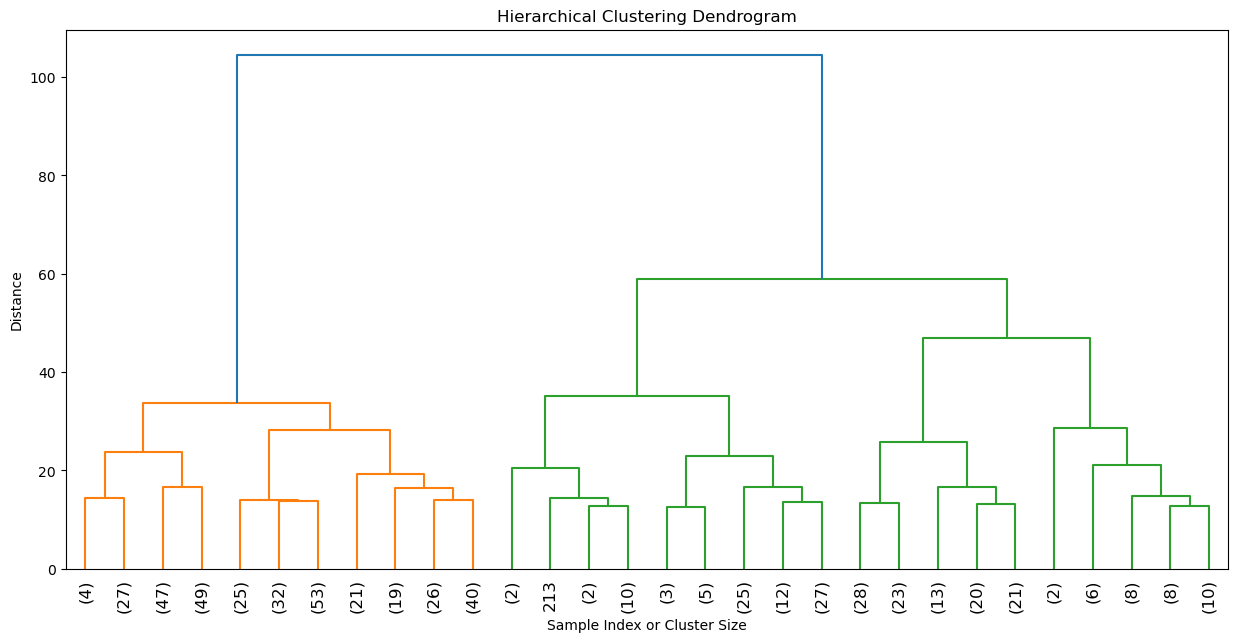

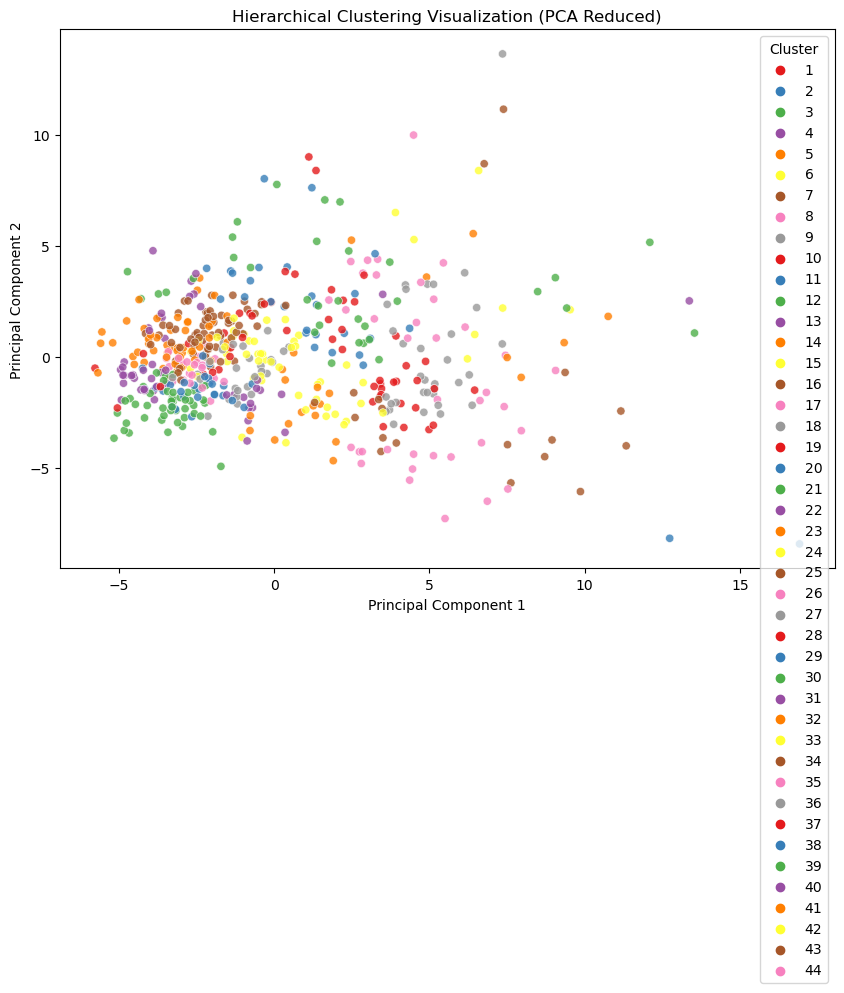

In [16]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Remove unnecessary columns
df = df.drop(columns=['id', 'Unnamed: 32'], errors='ignore')

# Numeric features
numeric_columns = df.select_dtypes(include=['float64']).columns
X = df[numeric_columns]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Hierarchical clustering
linked = linkage(X_scaled, method='ward')  # Use Ward's linkage method

# Dendrogram
plt.figure(figsize=(15, 7))
dendrogram(linked, truncate_mode='lastp', p=30, leaf_rotation=90, leaf_font_size=12)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index or Cluster Size')
plt.ylabel('Distance')
plt.show()

# Assign clusters based on a distance threshold
max_distance = 10  # Adjust this based on the dendrogram
clusters = fcluster(linked, max_distance, criterion='distance')

# Cluster label
df['Cluster'] = clusters


# Scatter plot of the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set1', alpha=0.8)
plt.title('Hierarchical Clustering Visualization (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()